# Assignment 1 - Gruppe 11

In [84]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 
from skimage import io, morphology
import numpy as np
import queue
import math

## Exercise 1.1

rough sketch for ex 1.2:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



In [2]:
image = io.imread('images/pacman.jpg')

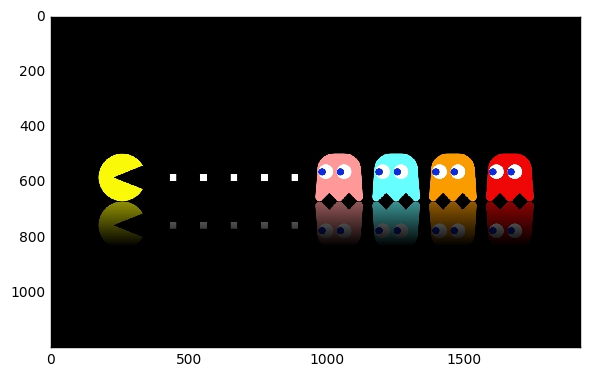

In [3]:
io.imshow(image[:, :])

In [4]:
image.shape

(1200, 1920, 3)

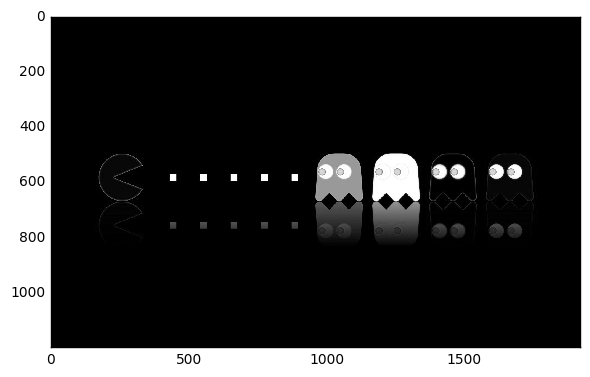

In [5]:
image_r = image[:,:,2]
io.imshow(image_r)

### Now try a first value for P with the aim of extracting the yellow pacman

In [6]:
# define space P
red_bottom = 245
red_top = 251

green_bottom = 245
green_top = 251

blue_bottom = 0
blue_top = 10


In [7]:
# extract the single channels 
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

# only keep points that lie within the boundaries of P
red_mask = np.logical_and(red_channel>red_bottom,red_channel<red_top)
green_mask = np.logical_and(green_channel>green_bottom,green_channel<green_top)
blue_mask = np.logical_and(blue_channel>blue_bottom,blue_channel<blue_top)

In [8]:
red_mask.shape

(1200, 1920)

In [9]:
# see how many pixel we keep
np.count_nonzero(red_mask)

31112

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


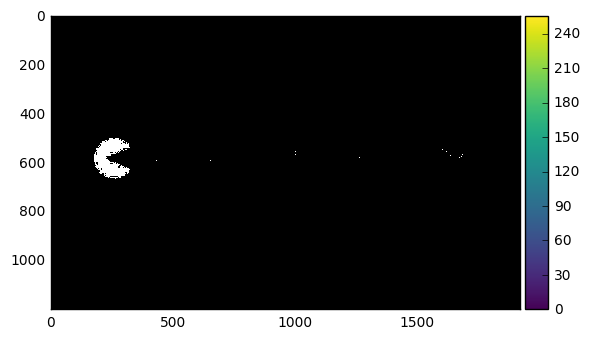

In [10]:
# paint all the pixel within P white, the rest black
img_copy = np.copy(image)
white = np.logical_and(red_mask, green_mask, blue_mask)
black = np.logical_not(np.logical_and(red_mask, green_mask, blue_mask))
img_copy[white] = np.array([255,255,255])
img_copy[black] = np.array([0,0,0])
io.imshow(img_copy)

In [11]:
# we define a function that can paint three pictures at the same time
# given different subspaces P
def subspaces(image, subspaces):
    """receives the 3 value pairs for each man in pacman"""
    fig = plt.figure(figsize=(12, 4))
    columns = 3
    rows = 1
    index = 1
    
    for subspace in subspaces:
        
        # retreive values from input
        red_bottom = subspace[0]
        red_top = subspace[1]

        green_bottom = subspace[2]
        green_top = subspace[3]

        blue_bottom = subspace[4]
        blue_top = subspace[5]
        
        #extract the channels
        red_channel = image[:,:,0]
        green_channel = image[:,:,1]
        blue_channel = image[:,:,2]

        # do the mask logic
        red_mask = np.logical_and(red_channel>red_bottom,red_channel<red_top)
        green_mask = np.logical_and(green_channel>green_bottom,green_channel<green_top)
        blue_mask = np.logical_and(blue_channel>blue_bottom,blue_channel<blue_top)
        
        # create the binary image
        img_copy = np.copy(image)
        white = np.logical_and(red_mask, green_mask, blue_mask)
        black = np.logical_not(np.logical_and(red_mask, green_mask, blue_mask))
        img_copy[white] = np.array([255,255,255])
        img_copy[black] = np.array([0,0,0])
        
        # add the subplot
        ax = fig.add_subplot(rows, columns, index)

        title = """Red Values {} \n Green Values {} \n Blue Values {}"""
        title = title.format((red_bottom, red_top), (green_bottom, green_top), (blue_bottom, blue_top))
        ax.set_title(title)
        plt.imshow(img_copy)
        index += 1
        
    plt.show()

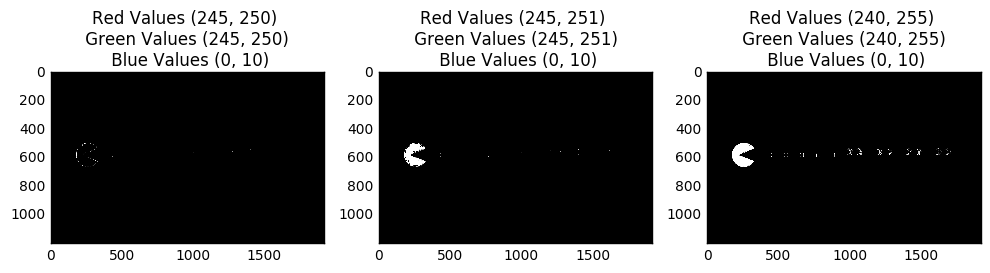

In [12]:
# play around with shape and size of P to extract the yellow pacman
# in the left picture, P is too small
# the middle one is a close-to-perfect-approximation
# in the right one P is too big
subspaces(image, [[245,250,245,250,0,10],[245,251,245,251,0,10],[240,255,240,255,0,10]])

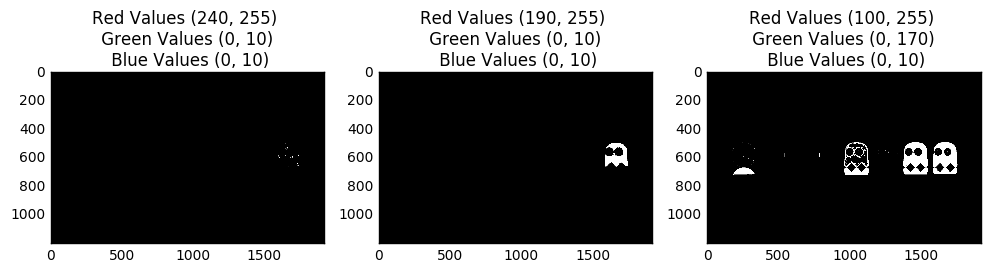

In [13]:
# play around with shape and size of P to extract the red ghost
# in the left picture, P is too small
# the middle one is a close-to-perfect-approximation
# in the right one P is too big and we also get the pink and orange ghost
subspaces(image, [[240,255,0,10,0,10],[190,255,0,10,0,10],[100,255,0,170,0,10]])

## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

### We first make an image copy that contains noise. We have seen above for with P, this holds

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


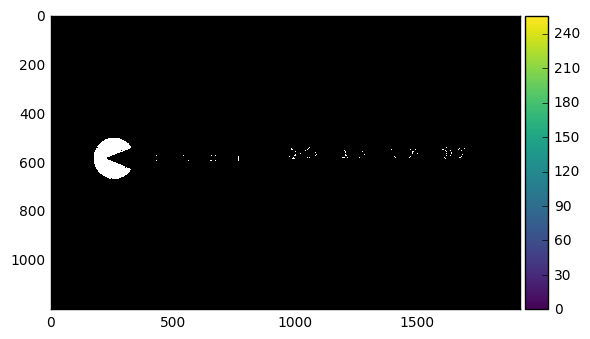

In [14]:
# define space
red_bottom = 240
red_top = 254

green_bottom = 240
green_top = 254

blue_bottom = 0
blue_top = 10

red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

red_mask = np.logical_and(red_channel>red_bottom,red_channel<red_top)
green_mask = np.logical_and(green_channel>green_bottom,green_channel<green_top)
blue_mask = np.logical_and(blue_channel>blue_bottom,blue_channel<blue_top)

img_copy = np.copy(image)
white = np.logical_and(red_mask, green_mask, blue_mask)
black = np.logical_not(np.logical_and(red_mask, green_mask, blue_mask))
img_copy[white] = np.array([255,255,255])
img_copy[black] = np.array([0,0,0])
io.imshow(img_copy)

### We then perform the erode operation

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


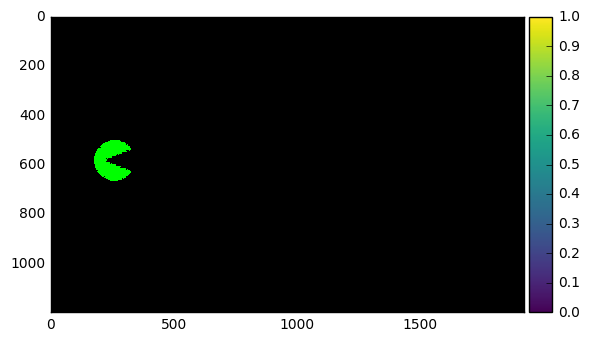

In [15]:
eroded = morphology.binary_erosion(img_copy)
io.imshow(eroded.astype(int))

The erode operation erases the noise

### Then, we perform a dilation

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


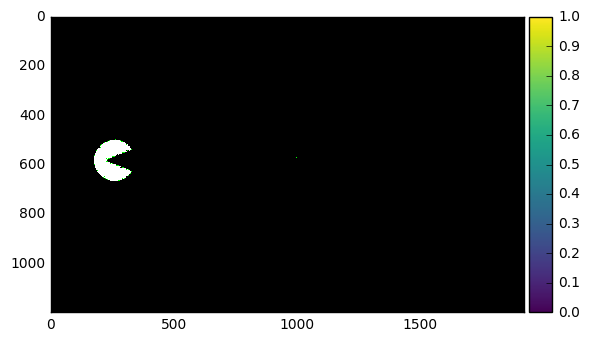

In [16]:
dilated = morphology.binary_dilation(eroded.astype(int))
io.imshow(dilated.astype(int))

The dilation restores the nice boundaries of the pacman

### The values are 0 and 255, but we do want them to be 0 and 1

In [17]:
gray = dilated.astype(int)[:,:,0]
np.unique(gray)

array([0, 1])

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


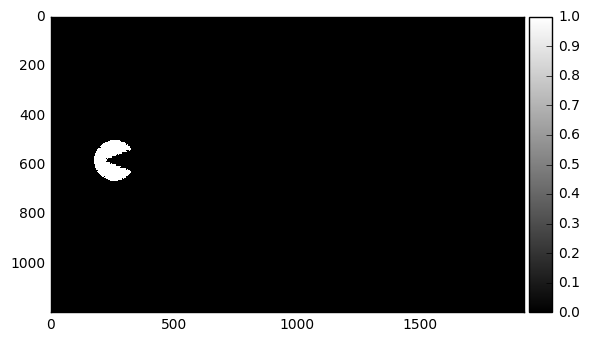

In [18]:
io.imshow(gray, cmap='binary_r')

### We define a funktion that does all erosion, deletion and value conversion to 1 and 0


In [19]:
def process_image(image):
    eroded = morphology.binary_erosion(image)
    dilated = morphology.binary_dilation(eroded.astype(int))
    gray = dilated.astype(int)[:,:,0]
    
    return gray

### Now, we define  the one-pass algorithm, that, given a binary picture, returns a dictionary that contains labels for all components as keys and as values a list of pixels (as tuples) that belong to this component

In [20]:
# Function to find the components

def find_component_dict(binary_image):
    q  = queue.Queue()
    label_dict = {}
    current_label = 1

    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):

            # if pixel is a foreground pixel, then it is white. If it is also not labeled
            if binary_image[i,j] == 1 and (i,j) not in label_dict.keys():

                label_dict[(i,j)] = current_label

                q.put((i,j))

                while not q.empty():

                    element = q.get()

                    # erstelle Nachbarliste
                    x = element[0]
                    y = element[1]

                    # we use the 4-neighborhood
                    neighbors = []

                    if x+1 < binary_image.shape[0]:
                        neighbors.append((x+1,y))

                    if y+1 < binary_image.shape[1]:
                        neighbors.append((x,y+1))

                    if x-1 >= 0:
                        neighbors.append((x-1,y))

                    if y-1 >= 0:
                         neighbors.append((x,y-1))

                    for neighbor in neighbors:
                        if binary_image[neighbor] == 1 and neighbor not in label_dict.keys():

                            label_dict[neighbor] = current_label
                            q.put(neighbor)

                current_label+=1


            else: 
                pass
            
    
    # now "invert" the dict such that the pixels are no longer the keys, but their label
    inv_label_dict = {}
    for k, v in label_dict.items():

        #if already value exists, append to list
        if v in inv_label_dict:
            inv_label_dict[v].append(k)



        #else make append
        else:
            inv_label_dict[v]=[k]
            
    return inv_label_dict



### We then make a threshold function, that only keeps components with a certain size. To iterate over the values cast them to a list of lists

In [21]:
def threshold_components(threshold, components):
    big_label_dict = {}

    for k, v in components.items():

        if len(v) > threshold:
            big_label_dict[k]=v
    return list(big_label_dict.values())


### For each resulting component, get the values needed to draw a rectangle (minX, minY and width, height). We store them in a list of lists

In [22]:
# now find min and max x and y values
# NOTICE: x is the vertical axis in the picture
# y is the horizontal one

def find_rectangles(big_label_list):
    
    list_of_rectangles = []
    
    for big_label in big_label_list:
        
        minY = big_label[0][0]
        minX = big_label[0][1]
        maxY = big_label[0][0]
        maxX = big_label[0][1]
        
        for tup in big_label: 

            if tup[0] < minY:
                minY = tup[0]

            if tup[1] < minX:
                minX = tup[1]

            if tup[0] > maxY:
                maxY = tup[0]

            if tup[1] > maxX:
                maxX = tup[1]
                
        width = maxX - minX
        height = maxY - minY
        rectangle = [minX, minY, width, height]
        list_of_rectangles.append(rectangle)

    return list_of_rectangles
        


### We now need a function to display the images with the corresponding bounding boxes

In [23]:
def display_img_with_bboxes(image, list_of_rectangles):
    
    #im = np.array(dilated.astype(int))
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(image, cmap='binary_r')

    # Create a Rectangle patches
    for rectangle in list_of_rectangles:
        rect = patches.Rectangle((rectangle[0],rectangle[1]),rectangle[2],rectangle[3],linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()


### To perform the entire processing

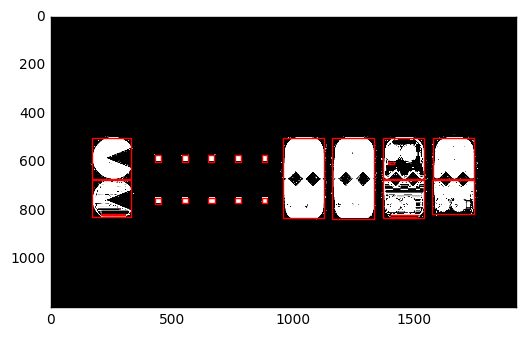

In [47]:
gray_image = process_image(image)
components = find_component_dict(gray_image)
th_components = threshold_components(100,components)
rectangles = find_rectangles(th_components)
display_img_with_bboxes(gray_image, rectangles)

## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)

In [25]:
# todo: 
# take about 10 pictures with maybe 2 objects on them
# perform the above-implemented functions on them
# write some lines that display our picture-series, once in real world color, once after the processing
# write code that extracts the middle-point of each bounding box and stores it somewhere
# write the tracking algorithm: for each bounding box in first frame start new track, connect always nearest
# write code that plots not only the bounding boxes, but also the centroids of each box in the track

In [26]:
def loadImages(nrOfImages):
    if not nrOfImages:
        print("At least one Image necessary")
        return None
    images = []
    print("Loading images...")
    for i in range(1,nrOfImages + 1):
        image_name = "images/0" + str(i) + ".jpg"
        print(image_name)
        image = io.imread(image_name)
        images.append(image)
    return images

def showImages(rows, cols, images, titles=None, hide_axis=True):
    fig = plt.figure(figsize=(12, 4))
    index = 1
    nrOfImages = len(images) 
    for i in range(nrOfImages):
        image = images[i]
        ax = fig.add_subplot(rows, cols, index)
        if hide_axis:
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
        if titles:
            title = titles[i]
            ax.set_title(title)
        plt.imshow(image)
        index += 1
    plt.show()

Loading images...
images/01.jpg
images/02.jpg
images/03.jpg
images/04.jpg
images/05.jpg
images/06.jpg
images/07.jpg


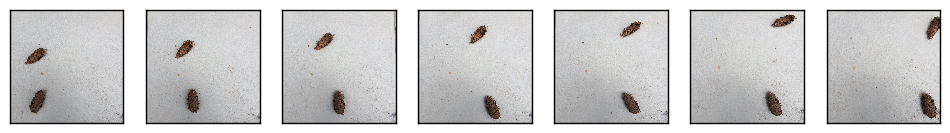

In [27]:
series = loadImages(7)
showImages(1,7,series)

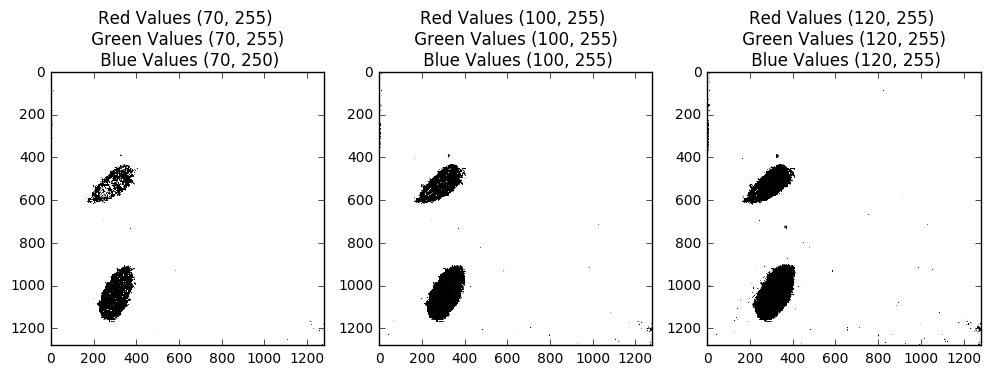

In [28]:
# We try some P spaces to find a good subspace. 
# The middle one seems adequate for processing
subspaces(series[0], [[70,255,70,255,70,250],[100,255,100,255,100,255],[120,255,120,255,120,255]])

In [29]:
def get_image_in_subspace(image, subspace):
    red_bottom = subspace[0]
    red_top = subspace[1]

    green_bottom = subspace[2]
    green_top = subspace[3]

    blue_bottom = subspace[4]
    blue_top = subspace[5]

    #extract the channels
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]

    # do the mask logic
    red_mask = np.logical_and(red_channel>red_bottom,red_channel<red_top)
    green_mask = np.logical_and(green_channel>green_bottom,green_channel<green_top)
    blue_mask = np.logical_and(blue_channel>blue_bottom,blue_channel<blue_top)

    # create the binary image
    img_copy = np.copy(image)
    white = np.logical_and(red_mask, green_mask, blue_mask)
    black = np.logical_not(np.logical_and(red_mask, green_mask, blue_mask))
    img_copy[white] = np.array([255,255,255])
    img_copy[black] = np.array([0,0,0])
    
    return img_copy

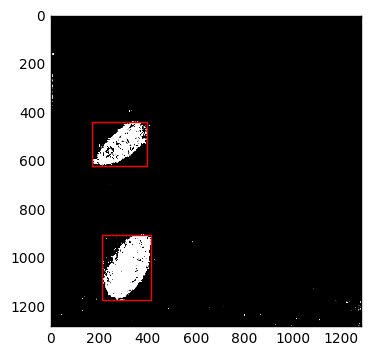

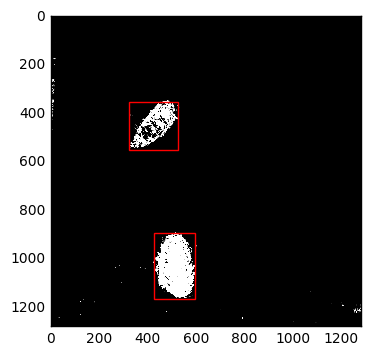

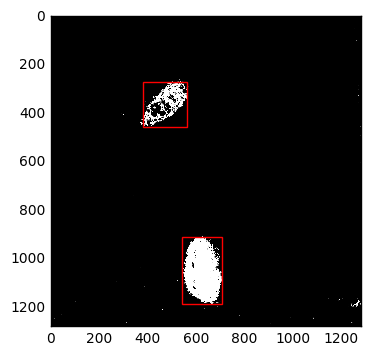

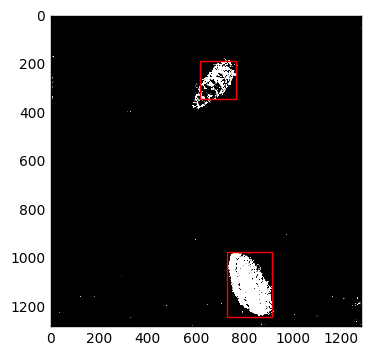

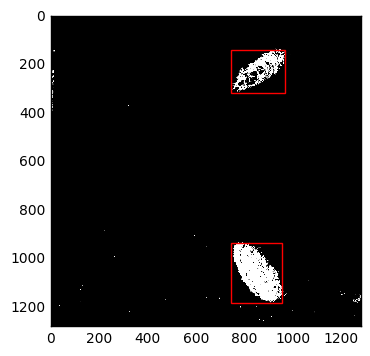

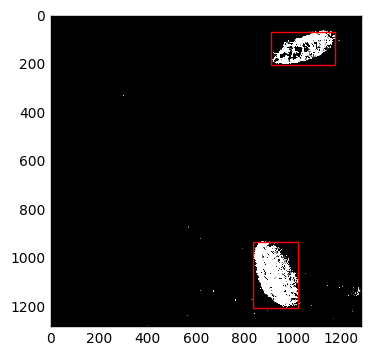

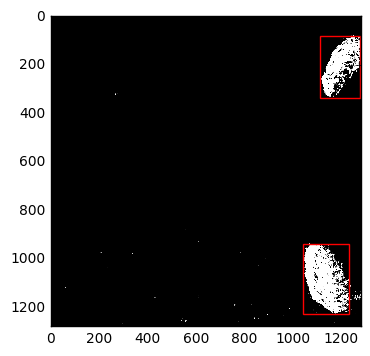

In [75]:
for i in range(len(series)):
    ser1 = get_image_in_subspace(series[i],[0,130,0,130,0,130])
    gray_image = process_image(ser1)
    components = find_component_dict(gray_image)
    th_components = threshold_components(5000,components)
    rectangles = find_rectangles(th_components)
    display_img_with_bboxes(gray_image, rectangles)

In [85]:
def calc_dist(a, b):
    dist = math.sqrt( (b[0] - a[0])**2 + (b[1] - a[1])**2 )
    return dist

def getCenters(image):
    ser1 = get_image_in_subspace(image,[0,130,0,130,0,130])
    gray_image = process_image(ser1)
    components = find_component_dict(gray_image)
    th_components = threshold_components(5000,components)
    rectangles = find_rectangles(th_components)
    centers = []
    for rect in rectangles:
        minX = rect[0]
        minY = rect[1]
        width = rect[2]
        height = rect[3]
        center_x = minX + width/2
        center_y = minY + height/2
        centers.append([center_x, center_y])
        
    return centers

def tracking(series):
    tracks = []
    # bounding boxes and centers
    init_frame = series[0]
    track_start = getCenters(init_frame)
    for center in track_start:
        track = [center]
        tracks.append(track)
        
        
    track_ends = [track[-1] for track in tracks]
    for image in series[1:]:
        centers = getCenters(image)
        for center in centers:
            distances = [calc_dist(center, track_end) for track_end in track_ends]
            min_index = np.argmin(distances)
            tracks[min_index].append(center)
    
    return tracks
    

In [90]:
t = tracking(series)

In [91]:
t

[[[284.0, 526.5],
  [424.5, 450.0],
  [472.5, 363.0],
  [689.0, 262.0],
  [855.5, 226.0],
  [1040.5, 132.0],
  [1194.5, 209.0]],
 [[312.5, 1036.5],
  [512.0, 1029.0],
  [625.0, 1048.5],
  [820.0, 1107.0],
  [850.0, 1058.0],
  [928.0, 1066.5],
  [1136.5, 1083.5]]]

In [104]:
def display_img_with_bboxes_and_tracks(image, list_of_rectangles, tracks):
    
    #im = np.array(dilated.astype(int))
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(image, cmap='binary_r')

    # Create a Rectangle patches
    for rectangle in list_of_rectangles:
        rect = patches.Rectangle((rectangle[0],rectangle[1]),rectangle[2],rectangle[3],linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
    
    for track in tracks:
        first_component = [tre[0] for tre in track]
        second_component = [tre[1] for tre in track]
        plt.plot(first_component, second_component)
         

    plt.show()


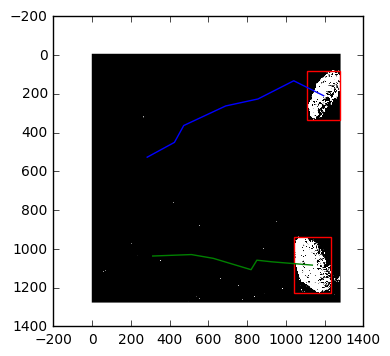

In [106]:
ser1 = get_image_in_subspace(series[-1],[0,130,0,130,0,130])
gray_image = process_image(ser1)
components = find_component_dict(gray_image)
th_components = threshold_components(5000,components)
rectangles = find_rectangles(th_components)
display_img_with_bboxes_and_tracks(gray_image, rectangles, t)
